In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import uproot

In [4]:
dfsData = []
dfsDataLite = []
with uproot.open('/home/mdicosta/LocalTestsO2/dplustree/mcfull/AO2D.root') as f:
    print(f.keys())
    for iKey, key in enumerate(f.keys()):
        if 'O2hfcanddpfull' in key:
            print(key)
            dfData = f[key].arrays(library='pd')
            dfsData.append(dfData)

full_df = pd.concat([df for df in dfsData], ignore_index=True)
print(f"len(full_df): {len(full_df)}")

['DF_2261906130553975;1', 'DF_2261906130553975/O2hfcanddpfull;1', 'DF_2261906130554103;1', 'DF_2261906130554103/O2hfcanddpfull;1', 'DF_2261906130554231;1', 'DF_2261906130554231/O2hfcanddpfull;1', 'DF_2261906130554359;1', 'DF_2261906130554359/O2hfcanddpfull;1', 'DF_2261906130554487;1', 'DF_2261906130554487/O2hfcanddpfull;1', 'DF_2261906080643575;1', 'DF_2261906080643575/O2hfcanddpfull;1', 'DF_2261906080643703;1', 'DF_2261906080643703/O2hfcanddpfull;1', 'DF_2261906080643831;1', 'DF_2261906080643831/O2hfcanddpfull;1', 'DF_2261906080643959;1', 'DF_2261906080643959/O2hfcanddpfull;1', 'DF_2261906080644087;1', 'DF_2261906080644087/O2hfcanddpfull;1', 'DF_2261906082516855;1', 'DF_2261906082516855/O2hfcanddpfull;1', 'DF_2261906082516983;1', 'DF_2261906082516983/O2hfcanddpfull;1', 'DF_2261906082517111;1', 'DF_2261906082517111/O2hfcanddpfull;1', 'DF_2261906082517239;1', 'DF_2261906082517239/O2hfcanddpfull;1', 'DF_2261906082517367;1', 'DF_2261906082517367/O2hfcanddpfull;1', 'DF_2261906083756535;1',

In [5]:
print(full_df.columns)

Index(['fIndexBCs', 'fNumContrib', 'fPosX', 'fPosY', 'fPosZ',
       'fXSecondaryVertex', 'fYSecondaryVertex', 'fZSecondaryVertex',
       'fErrorDecayLength', 'fErrorDecayLengthXY', 'fChi2PCA',
       'fRSecondaryVertex', 'fDecayLength', 'fDecayLengthXY',
       'fDecayLengthNormalised', 'fDecayLengthXYNormalised',
       'fImpactParameterNormalised0', 'fPtProng0', 'fPProng0',
       'fImpactParameterNormalised1', 'fPtProng1', 'fPProng1',
       'fImpactParameterNormalised2', 'fPtProng2', 'fPProng2', 'fPxProng0',
       'fPyProng0', 'fPzProng0', 'fPxProng1', 'fPyProng1', 'fPzProng1',
       'fPxProng2', 'fPyProng2', 'fPzProng2', 'fImpactParameter0',
       'fImpactParameter1', 'fImpactParameter2', 'fErrorImpactParameter0',
       'fErrorImpactParameter1', 'fErrorImpactParameter2',
       'fImpactParameterZ0', 'fImpactParameterZ1', 'fImpactParameterZ2',
       'fErrorImpactParameterZ0', 'fErrorImpactParameterZ1',
       'fErrorImpactParameterZ2', 'fNSigTpcPi0', 'fNSigTpcKa0', 'fNSigTof

In [6]:
unique_values = full_df['fCentrality'].unique()
print("Unique values in fCentrality:", unique_values)

Unique values in fCentrality: [-1.]


/tmp/ipykernel_2035077/2406445017.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()  # Add legend to the current axis


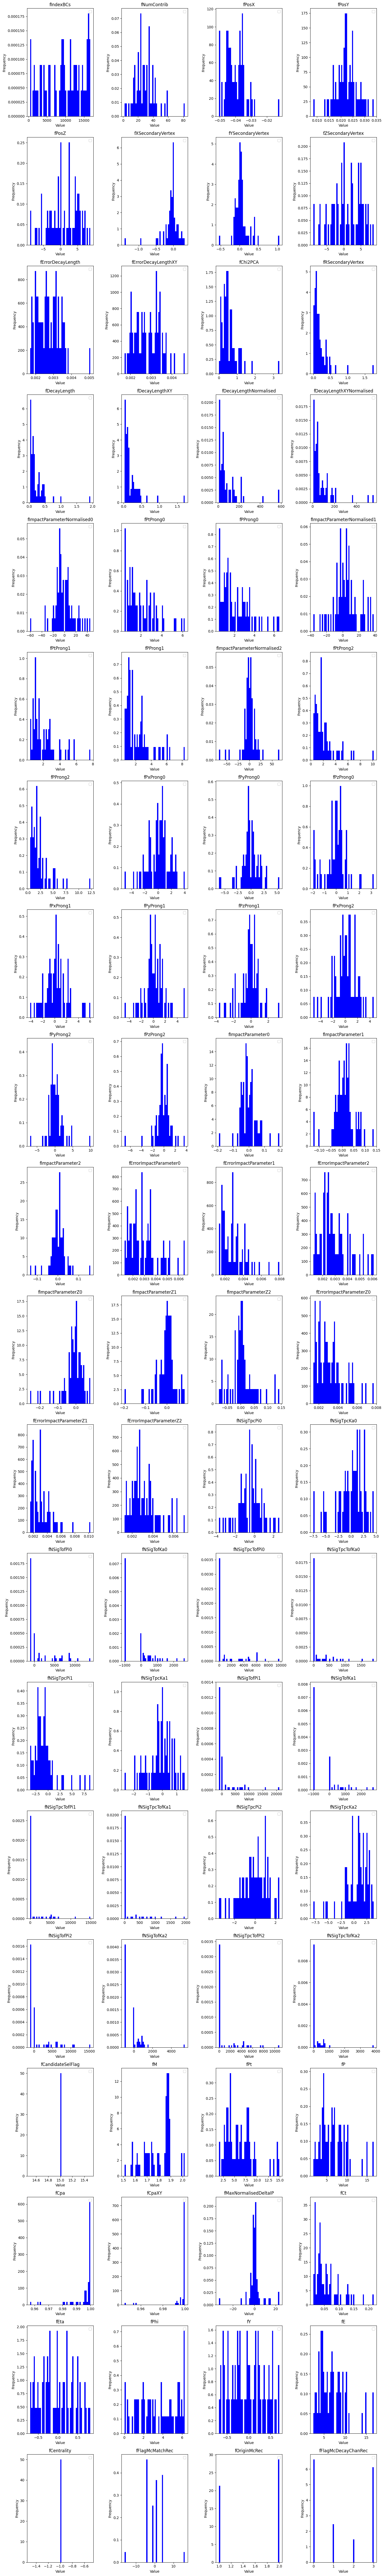

In [7]:
n_columns = len(full_df.columns)
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(full_df.columns):
    axes[i].hist(full_df[column], bins=50, color='blue', density=True)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    # axes[i].set_yscale('log')
    axes[i].legend()  # Add legend to the current axis

# Remove unused axes if any
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

<Axes: >

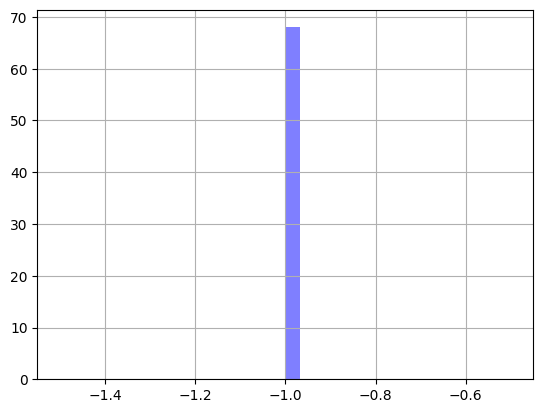

In [8]:
full_df['fCentrality'].hist(bins=30, color='blue', alpha=0.5, label='Matched')